In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Input Data

In [3]:
ds_pc, info_pc = tfds.load('amazon_us_reviews/Health_Personal_Care_v1_00', with_info=True, split='train')

In [4]:
ds_home, info_home = tfds.load('amazon_us_reviews/Home_Improvement_v1_00', with_info=True, split='train')

In [5]:
ds_kitchen, info_kitchen = tfds.load('amazon_us_reviews/Kitchen_v1_00', with_info=True, split='train')

In [6]:
for row in ds.take(2):
    print(row)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'16129698'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Apparel'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B00EEDE58C'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'985996069'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b"Club Room Men's Yellow Canvas & Brown Leather Belt Size 36">, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'Well made. Stylish. True to size. Good for golfing.'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2014-10-11'>, 'review_headline': <tf.Tensor: shape=(), dtype=string, numpy=b'Nice belt'>, 'review_id': <tf.Tensor: shape=(), dtype=string, numpy=b'R2EH4YU3UI3C06'>, 'star_rating': <tf.Tensor: shape=(), dtype=int32, numpy=5>, 'total_votes': <tf.Tensor: shape=(), dtype=int32,

In [6]:
data = []
for row in ds_pc:
    if row['data']['verified_purchase'].numpy() == 1:
        row_data = []
        for i in row['data']:
            row_data.append(row['data'][i].numpy())
        data.append(row_data)

In [7]:
#data = []
for row in ds_home:
    if row['data']['verified_purchase'].numpy() == 1:
        row_data = []
        for i in row['data']:
            row_data.append(row['data'][i].numpy())
        data.append(row_data)

In [8]:
#data = []
for row in ds_kitchen:
    if row['data']['verified_purchase'].numpy() == 1:
        row_data = []
        for i in row['data']:
            row_data.append(row['data'][i].numpy())
        data.append(row_data)

In [9]:
df = pd.DataFrame(data, columns = ['customer_id', 'helpful_votes','marketplace', 'product_category','product_id','product_parent','product_title','review_body','review_date','review_headline','review_id','star_rating','total_votes','verified_purchase','vine'])

In [10]:
df.head()

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
0,b'25337113',0,b'US',b'Health & Personal Care',b'B00N2816E6',b'869494492',b'Nexgen Biolabs Caralluma Pro Caralluma Fimbr...,"b'Perfect for weight loss, appetite suppressio...",b'2014-10-25',b'Five Stars',b'RT83IB0SPCQWW',5,0,1,1
1,b'35521258',3,b'US',b'Health & Personal Care',b'B00GABZY7W',b'542127342',b'Garcinia Cambogia Extract Pure Max SUPER STR...,b'I did a lot of research on this product befo...,b'2014-02-12',b'A must have product!',b'R25HPQLKU7A30E',5,4,1,1
2,b'28367620',0,b'US',b'Health & Personal Care',b'B00ONB9JIG',b'819644889',b'PRO-Dental: Probiotics for Oral & Dental Hea...,b'Truly works I have been taking these for a f...,b'2015-08-06',b'Truly works',b'R187T3GEAVEL1Z',5,0,1,1
3,b'51615833',0,b'US',b'Health & Personal Care',b'B00FXTO7CK',b'823347185',b'Dr. Fuji FJ-4600 Cyber Relax Massage Chair -...,"b'Note that this is the Fuji FJ-4600B, not the...",b'2015-01-20',b'Luxurious and awesome',b'RIR6HL5GW132P',5,0,1,1
4,b'9209164',13,b'US',b'Health & Personal Care',b'B007B405M6',b'206733858',b'liji shou slimming weight loss capsules 30 d...,b'I have been taking Liji Shou for YEARS. It w...,b'2013-07-03',b'Been Taking Liji Shou for YEARS!',b'R3AD4A2YD4JMYT',5,15,1,1


# Exploratory Data Analysis

In [11]:
df.shape

(1937848, 15)

In [42]:
df.dtypes

customer_id          object
helpful_votes         int64
marketplace          object
product_category     object
product_id           object
product_parent       object
product_title        object
review_body          object
review_date          object
review_headline      object
review_id            object
star_rating           int64
total_votes           int64
verified_purchase     int64
vine                  int64
dtype: object

In [53]:
print('Number of unique customers: ', df.customer_id.nunique())
print('Number of unique products: ', df.product_id.nunique())
print('Review per customer: ', len(df)/df.customer_id.nunique())
print('Review per product: ', len(df)/df.product_id.nunique())

Number of unique customers:  1285915
Number of unique products:  450860
Review per customer:  1.5069798548115545
Review per product:  4.2981147141019385


In [60]:
df['star_rating'].describe()

count    1.937848e+06
mean     3.954521e+00
std      1.487974e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: star_rating, dtype: float64

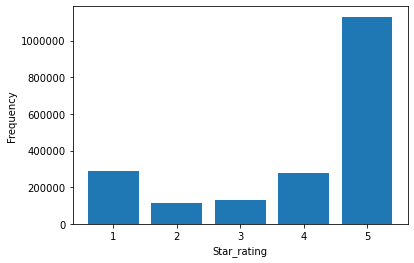

In [83]:
labels, counts = np.unique(df.star_rating, return_counts=True)
plt.bar(labels, counts, align='center')
plt.ticklabel_format(style='plain')
plt.gca().set_xticks(labels)
plt.ylabel('Frequency')
plt.xlabel('Star_rating')
plt.show()

In [9]:
list_data = list(df_combined_id.product_id)

In [14]:
def is_qualified(basket, list_item):
    status = False
    for item in basket:
        if item in list_item:
            status = True
    return status

In [81]:
is_qualified(filtered_list[0], qualified_items)

False

In [17]:
filtered_list = [item for item in list_data if len(item) >= 4]

In [11]:
filtered_list

[[b'B00K065KOA', b'B00DPHC4TU', b'B00IJJGE4U', b'B00FEM368M'],
 [b'B002R0F9UM', b'B00I16OG5U', b'B00L228US4'],
 [b'B0089DXUC0', b'B00D1DPR6A', b'B008CGQQPW'],
 [b'B0002W2VF8', b'B0011UOQ4O', b'B0002PD8F2'],
 [b'B008N2693O', b'B007ULRFW8', b'B002IRDS16', b'B002HJ377A'],
 [b'B00MNGNJZC', b'B00L1VT84G', b'B00IIWDNJW', b'B00EZJWQL8'],
 [b'B00DYZ9JA0', b'B00EB5NXY0', b'B00FPEK4HK'],
 [b'B00GV35J5Q', b'B003THEL3I', b'B00HFJSAQA', b'B00BD7I64Q'],
 [b'B00CEYYIS0',
  b'B00AALL44U',
  b'B00B58OZPM',
  b'B007G0UQCO',
  b'B00IOJ7FGQ',
  b'B0096P9LDC',
  b'B00CTUV1YS',
  b'B005CZUS6Y'],
 [b'B001E52C9W', b'B00PAG3TRU', b'B00O5XFZFI', b'B0093DPE9C'],
 [b'B0015LZ16Q', b'B00I520NXE', b'B00BPK313C'],
 [b'B00GMFP3C2', b'B00DW4NC42', b'B00FDMURY4'],
 [b'B014EQRMVK',
  b'B0146OCINM',
  b'B010N4EY22',
  b'B00ZHILRYS',
  b'B010LJ8N94',
  b'B0105UU0G8',
  b'B00YMSHQ0S',
  b'B00Z5QKE2S',
  b'B00WQR4HQS',
  b'B010M8058Q',
  b'B0111XMV9M',
  b'B012F00LAQ',
  b'B00VHKSA7W',
  b'B011TRX06S',
  b'B00X3OH4W2',
  b'B

In [18]:
frequency = (df.groupby('product_id').customer_id.count() / df.customer_id.nunique())
#qualified = frequency[frequency >= 2].index
#qualified
qualified_items = frequency[frequency >= 0.0001].index
#qualified_items

In [19]:
ar_list = []
for basket in filtered_list:
    if is_qualified(basket, qualified_items):
        ar_list.append(basket)
ar_list

[[b'B008N2693O', b'B007ULRFW8', b'B002IRDS16', b'B002HJ377A'],
 [b'B005SW52RG', b'B00AM1O8T6', b'B000SKI752', b'B002EMDCCK', b'B003BSVUIO'],
 [b'B00FYF3R4M', b'B00246TOIW', b'B008VL8AW0', b'B00BZP1OI6'],
 [b'B006YL7N4K',
  b'B00JKGF3UC',
  b'B00EY4DNIE',
  b'B00I7XU03O',
  b'B00J9APBUG',
  b'B00HWRPBJO',
  b'B00I808CPO',
  b'B00MH9MD98',
  b'B00JAWV1IO'],
 [b'B009I4ZXDS',
  b'B00J4QL6J0',
  b'B00422MCVW',
  b'B005GZD90M',
  b'B003ICJLHU',
  b'B005OJ4W06',
  b'B003CJPBSM'],
 [b'B00L3KTBIS', b'B00G57AYZI', b'B008Q0E61U', b'B007038W1Y'],
 [b'B00CFIB540', b'B00M55A7DS', b'B00L36O1IC', b'B00MTFKBVC'],
 [b'B00OSI9UQU',
  b'B011ZYQ0ZS',
  b'B00SUVRGB2',
  b'B00SVZWB7Q',
  b'B00R55AH74',
  b'B011WY2ULY',
  b'B012CKH1YI',
  b'B00R55AXKU',
  b'B00VS2JV72',
  b'B00SXQJGBC',
  b'B00SUMGC5M',
  b'B00SUNQTWM',
  b'B0122YKNBW',
  b'B00SUOIHL2',
  b'B00VS2ILWS',
  b'B00TXX4F10',
  b'B00OLHHUPG',
  b'B00X37OO1S',
  b'B00SUMXGCO'],
 [b'B00ATOQVJG',
  b'B00CHZLLR2',
  b'B00CHZM1KS',
  b'B00ATC6RUQ',
  b'

In [10]:
v = df.customer_id.value_counts()
v

b'39789300'    795
b'53037408'    622
b'51346302'    622
b'49266466'    612
b'50820654'    554
              ... 
b'21853566'      1
b'15108230'      1
b'12439376'      1
b'1297498'       1
b'12884194'      1
Name: customer_id, Length: 1285915, dtype: int64

In [43]:
frequent_cus = df[df.customer_id.isin(v.index[v.gt(50)])]
frequent_cus.shape

(82366, 15)

In [280]:
len(set(frequent_cus.customer_id))

832

In [55]:
v_item = frequent_cus.product_id.value_counts()
v_item

b'B00DUHACEE'    70
b'B00KM9W2PU'    50
b'B00NNTBF22'    46
b'B00HHLNRVE'    44
b'B00KIC4DF8'    43
                 ..
b'B007X6OET2'     1
b'B000GCI9OQ'     1
b'B005HB49MC'     1
b'B0026RHHX8'     1
b'B000S8EQFO'     1
Name: product_id, Length: 35447, dtype: int64

In [52]:
v_item[:30]

b'B00DUHACEE'    70
b'B00KM9W2PU'    50
b'B00NNTBF22'    46
b'B00HHLNRVE'    44
b'B00KIC4DF8'    43
b'B00H0OJPTG'    42
b'B00MIZM206'    40
b'B00KOJ51II'    40
b'B00OG5O37Q'    38
b'B00RTLWCCM'    36
b'B00KY5S81O'    36
b'B00CUJMDNG'    36
b'B00JR39AUM'    36
b'B009HEZ03W'    35
b'B00I937QEI'    35
b'B00LPR2ZAU'    35
b'B00RWYSNQU'    34
b'B00RH5I8U0'    34
b'B00OAGB27U'    34
b'B00GPUH6SI'    34
b'B00COCD6TO'    34
b'B00MNSGWIQ'    34
b'B00KFETGW4'    33
b'B00JL2TURM'    33
b'B00JWEYN58'    33
b'B00ESHDGOI'    32
b'B00ONH0S8U'    32
b'B00R8K9MGI'    32
b'B00DPNCEY4'    32
b'B00GM477G8'    32
Name: product_id, dtype: int64

In [75]:
frequent_item = frequent_cus[frequent_cus.product_id.isin(v_item.index[v_item.gt(38)])] # get the items bought over 38 times
frequent_v = frequent_item.customer_id.unique() # get the customer id who bought frequent items
frequent_df = frequent_cus[frequent_cus.customer_id.isin(frequent_v)]
frequent_df.shape

(29749, 15)

In [66]:
frequent_item

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
1550,b'9481126',0,b'US',b'Health & Personal Care',b'B00NNTBF22',b'281393741',b'PRO-15 Advanced Strength Probiotics: 3x the ...,b'GOOD',b'2015-03-30',b'Five Stars',b'R2RFRQI776953G',5,0,1,1
1826,b'23431457',0,b'US',b'Health & Personal Care',b'B00NNTBF22',b'281393741',b'PRO-15 Advanced Strength Probiotics: 3x the ...,b'I have been pleased with the performance of ...,b'2015-04-25',b'Very pleased.',b'RV4SNDITCSQBM',5,0,1,1
4863,b'28952152',0,b'US',b'Health & Personal Care',b'B00NNTBF22',b'281393741',b'PRO-15 Advanced Strength Probiotics: 3x the ...,"b""When looking for a probiotic, time released ...",b'2015-02-23',b'Good all purpose probiotic',b'R1RGZC9IBTJ4LS',4,0,1,1
6779,b'48005624',0,b'US',b'Health & Personal Care',b'B00NNTBF22',b'281393741',b'PRO-15 Advanced Strength Probiotics: 3x the ...,b'Goooddd',b'2015-03-30',b'Five Stars',b'R3UM7EIPL6WJY8',5,0,1,1
7218,b'13297909',0,b'US',b'Health & Personal Care',b'B00NNTBF22',b'281393741',b'PRO-15 Advanced Strength Probiotics: 3x the ...,b'works great',b'2015-04-01',b'thumbs up',b'R3MV59YDDF0KMO',5,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933954,b'49571217',2,b'US',b'Kitchen',b'B00DUHACEE',b'724369434',b'French press (Chrome)',b'What an easy way to fix coffee for a breakfa...,b'2014-07-25',b'EASY Coffee making for your guests....',b'R36E23E2LFIJ0',5,2,1,1
1934525,b'42035603',0,b'US',b'Kitchen',b'B00KIC4DF8',b'299212022',b'Smilism Diaper Bag',b'I love it !!! Works great !',b'2015-01-07',b'Five Stars',b'RFBSMYI7VFBGR',5,0,1,1
1934772,b'11825765',0,b'US',b'Kitchen',b'B00HHLNRVE',b'241998405',b'ORBLUE Propresser Stainless Steel Kitchen Ga...,"b""I love this garlic press it works really goo...",b'2014-07-27',b'Loved this product!!!',b'R6SWTX20E23R2',5,0,1,1
1934975,b'31970424',1,b'US',b'Kitchen',b'B00DUHACEE',b'724369434',b'French press (Chrome)',b'I got this for my husband for Christmas. He ...,b'2014-12-26',b'Best coffee flavor!!',b'R2Q5WQAD4Z9HGR',5,1,1,1


In [76]:
frequent_df = frequent_cus[frequent_cus.product_id.isin(v_item.index[v_item.gt(30)])]
frequent_df.shape

(1281, 15)

In [77]:
len(set(frequent_df.product_id)) # number of unique products

35

In [65]:
len(set(frequent_df.customer_id)) # number of unique customers

404

In [124]:
frequent_df.product_id.value_counts()

b'B00DUHACEE'    70
b'B00KM9W2PU'    50
b'B00NNTBF22'    46
b'B00HHLNRVE'    44
b'B00KIC4DF8'    43
b'B00H0OJPTG'    42
b'B00MIZM206'    40
b'B00KOJ51II'    40
b'B00OG5O37Q'    38
b'B00JR39AUM'    36
b'B00CUJMDNG'    36
b'B00RTLWCCM'    36
b'B00KY5S81O'    36
b'B00I937QEI'    35
b'B00LPR2ZAU'    35
b'B009HEZ03W'    35
b'B00OAGB27U'    34
b'B00RWYSNQU'    34
b'B00MNSGWIQ'    34
b'B00RH5I8U0'    34
b'B00GPUH6SI'    34
b'B00COCD6TO'    34
b'B00JL2TURM'    33
b'B00KFETGW4'    33
b'B00JWEYN58'    33
b'B00GM477G8'    32
b'B00R8K9MGI'    32
b'B00DPNCEY4'    32
b'B00ESHDGOI'    32
b'B00MSXW15E'    32
b'B00ONH0S8U'    32
b'B00LPW9X32'    31
b'B00RH5K26I'    31
b'B00PTSTST2'    31
b'B00EPPXRCE'    31
Name: product_id, dtype: int64

# Association Rule

In [13]:
import sys
from itertools import combinations, groupby
from collections import Counter

In [162]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
orders = df[['customer_id','product_id']].drop_duplicates().sort_values(by = ['customer_id']).set_index('customer_id')['product_id'].rename('item_id')
display(orders.head(10))
type(orders)

customer_id
b'10000011'    b'B001CJGM1E'
b'10000016'    b'B00V6REF3Y'
b'10000023'    b'B00BBOI9SO'
b'10000023'    b'B0001OP0KK'
b'10000023'    b'B0013AV8FM'
b'10000093'    b'B001DJ6J5W'
b'10000129'    b'B00472I1V2'
b'10000166'    b'B00BLSW4XQ'
b'10000211'    b'B0043ATR98'
b'10000229'    b'B00G0EJYFW'
Name: item_id, dtype: object

pandas.core.series.Series

In [134]:
df_test = pd.DataFrame(data, columns = ['customer_id', 'helpful_votes','marketplace', 'product_category','product_id','product_parent','product_title','review_body','review_date','review_headline','review_id','star_rating','total_votes','verified_purchase','vine'])

In [135]:
df_test = df_test[['customer_id','product_id']].drop_duplicates().sort_values(by = ['customer_id']).reset_index()
df_test = df_test[['customer_id','product_id']][:11]
df2 = pd.DataFrame([[df_test.customer_id[1],df_test.product_id[4]]], columns=df_test.columns)
df_test = pd.concat([df2, df_test])

df_test = df_test[['customer_id','product_id']].sort_values(by = ['customer_id']).reset_index()
df_test = df_test[['customer_id','product_id']]
df_test

,customer_id,product_id
0,b'10000016',b'B00TXX4MKY'
1,b'10000029',b'B004RSO8A4'
2,b'10000029',b'B00MIMJXUQ'
3,b'10000029',b'B00J9MBDU6'
4,b'1000011',b'B00ITHWTPA'
5,b'10000112',b'B004RSO8A4'
6,b'10000112',b'B005G7Q9CU'
7,b'10000161',b'B00I5B3UGC'
8,b'10000164',b'B00JFS2DBM'
9,b'10000238',b'B0016ZOV94'


In [136]:
for i in range(0,4):
    rep = df_test[:12].copy(deep=True)
    rep.customer_id = rep.customer_id + chr(i + 97).encode("ascii")
    df_test = df_test.append(rep, ignore_index = True)

In [137]:
orders_test = df_test[['customer_id','product_id']].set_index('customer_id')['product_id'].rename('item_id')
display(orders_test.head(12))
type(orders_test)

customer_id
b'10000016'    b'B00TXX4MKY'
b'10000029'    b'B004RSO8A4'
b'10000029'    b'B00MIMJXUQ'
b'10000029'    b'B00J9MBDU6'
b'1000011'     b'B00ITHWTPA'
b'10000112'    b'B004RSO8A4'
b'10000112'    b'B005G7Q9CU'
b'10000161'    b'B00I5B3UGC'
b'10000164'    b'B00JFS2DBM'
b'10000238'    b'B0016ZOV94'
b'10000329'    b'B00L3YPPKC'
b'10000329'    b'B005V1J1WQ'
Name: item_id, dtype: object

pandas.core.series.Series

In [198]:
title_list = df[['product_id', 'product_title', 'product_category']].drop_duplicates()

In [230]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().values
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
        
        #print(list(item_list))
              
        for item_pair in combinations(item_list, 2):
            #print(item_pair)
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift','categoryA','categoryB']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [165]:
def association_rules(order_item, min_support):

    print("Starting orders: {:25d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:12d}".format(min_support, len(qualifying_items)))
    print("Remaining orders: {:24d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining customers with 2+ items: {:7d}".format(len(qualifying_orders)))
    print("Remaining orders: {:24d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)
    
    #print(list(item_pair_gen))

    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    #print(freq(item_pair_gen))
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:30d}".format(len(item_pairs)))
    
    #print(item_pairs)


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]
    
    #print(item_pairs)

    print("Item pairs with support >= {}: {:7d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
   

    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [191]:
def association_rules(order_item, min_support):

    print("Starting orders: {:25d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item)


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:12d}".format(min_support, len(qualifying_items)))
    print("Remaining orders: {:24d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining customers with 2+ items: {:7d}".format(len(qualifying_orders)))
    print("Remaining orders: {:24d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item)


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)
    
    #print(list(item_pair_gen))

    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    #print(freq(item_pair_gen))
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders)

    print("Item pairs: {:30d}".format(len(item_pairs)))
    
    #print(item_pairs)


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]
    
    #print(item_pairs)

    print("Item pairs with support >= {}: {:7d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
   

    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [51]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
orders = orders_test.set_index('customer_id')['product_id'].rename('item_id')
display(orders.head(10))
type(orders)

customer_id
b'10000016'    b'B00TXX4MKY'
b'10000029'    b'B00J9MBDU6'
b'10000029'    b'B00MIMJXUQ'
b'1000011'     b'B00ITHWTPA'
b'10000112'    b'B004RSO8A4'
b'10000112'    b'B005G7Q9CU'
b'10000161'    b'B00I5B3UGC'
b'10000164'    b'B00JFS2DBM'
b'10000238'    b'B0016ZOV94'
b'10000329'    b'B005V1J1WQ'
Name: item_id, dtype: object

pandas.core.series.Series

In [192]:
%%time
rules = association_rules(orders_test, 0.0005) 

Starting orders:                        60
Items with support >= 0.0005:           11
Remaining orders:                       60
Remaining customers with 2+ items:      15
Remaining orders:                       35
Item pairs:                              5
Item pairs with support >= 0.0005:       5

Wall time: 48.6 ms


In [193]:
rules

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
2,b'B00MIMJXUQ',b'B00J9MBDU6',5,0.333333,5,0.333333,5,0.333333,1.0,1.0,3.0
4,b'B00L3YPPKC',b'B005V1J1WQ',5,0.333333,5,0.333333,5,0.333333,1.0,1.0,3.0
0,b'B004RSO8A4',b'B00MIMJXUQ',5,0.333333,10,0.666667,5,0.333333,0.5,1.0,1.5
1,b'B004RSO8A4',b'B00J9MBDU6',5,0.333333,10,0.666667,5,0.333333,0.5,1.0,1.5
3,b'B004RSO8A4',b'B005G7Q9CU',5,0.333333,10,0.666667,5,0.333333,0.5,1.0,1.5


In [160]:
df_test = pd.DataFrame(data, columns = ['customer_id', 'helpful_votes','marketplace', 'product_category','product_id','product_parent','product_title','review_body','review_date','review_headline','review_id','star_rating','total_votes','verified_purchase','vine'])

In [161]:
# Replace item ID with item name and display association rules
item_name   = df_test.rename(columns={'product_id':'item_id', 'product_title':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final.drop_duplicates())

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,"b""2014 Fashion Women's Summer Nautical Anchor ...",b'Sourpuss Anchor Cutout Top Black',5,33.333333,5,33.333333,5,33.333333,1.0,1.0,0.030
3,"b""Hello Kitty Girls' Heart Pattern Chambray Dr...","b'Sesame Street Elmo ""Major League"" Shirt - To...",5,33.333333,5,33.333333,5,33.333333,1.0,1.0,0.030
2,b'Extraordinary ARI N Seqn Work Hot BLK Sarong...,b'Sourpuss Anchor Cutout Top Black',5,33.333333,10,66.666667,5,33.333333,0.5,1.0,0.015
4,b'Extraordinary ARI N Seqn Work Hot BLK Sarong...,"b""2014 Fashion Women's Summer Nautical Anchor ...",5,33.333333,10,66.666667,5,33.333333,0.5,1.0,0.015
6,b'Extraordinary ARI N Seqn Work Hot BLK Sarong...,b'Erotic Looking Flowers Printed Sarong Paress...,5,33.333333,10,66.666667,5,33.333333,0.5,1.0,0.015


In [220]:
%%time
rules = association_rules(orders, 0.00008) 

Starting orders:                   1936496
Items with support >= 8e-05:         1493
Remaining orders:                   346929
Remaining customers with 2+ items:   29733
Remaining orders:                    91318
Item pairs:                          79235
Item pairs with support >= 8e-05:   15732

Wall time: 4.5 s


In [185]:
rules

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
3407,b'B006P030QU',b'B00DTP2GDC',4,0.013453,7,0.023543,8,0.026906,0.571429,0.500000,21.237857
12916,b'B001H55N7C',b'B000FERL1M',4,0.013453,13,0.043722,8,0.026906,0.307692,0.500000,11.435769
6778,b'B00FGPZOOG',b'B00HTC575K',3,0.010090,8,0.026906,12,0.040359,0.375000,0.250000,9.291562
10195,b'B00BIOBP7Y',b'B002ZH63HA',3,0.010090,12,0.040359,11,0.036996,0.250000,0.272727,6.757500
13313,b'B002ZH63HA',b'B00BIOBP7Y',3,0.010090,11,0.036996,12,0.040359,0.272727,0.250000,6.757500
...,...,...,...,...,...,...,...,...,...,...,...
15249,b'B00GGSDWH8',b'B00HK61L3C',3,0.010090,232,0.780278,669,2.250025,0.012931,0.004484,0.005747
10757,b'B00KY5S81O',b'B00N26M2F0',3,0.010090,210,0.706286,740,2.488817,0.014286,0.004054,0.005740
14486,b'B00N277J2A',b'B00M9YQ0J0',3,0.010090,547,1.839707,355,1.193960,0.005484,0.008451,0.004594
7459,b'B00KSQ8ZNA',b'B00N26M2F0',3,0.010090,263,0.884539,740,2.488817,0.011407,0.004054,0.004583


In [34]:
rules.shape

(19136, 11)

In [23]:
rules.dtypes

item_A             object
item_B             object
freqAB              int64
supportAB         float64
freqA               int64
supportA          float64
freqB               int64
supportB          float64
confidenceAtoB    float64
confidenceBtoA    float64
lift              float64
dtype: object

In [196]:
rules = rules.sort_values(by = ['freqAB'], ascending = False)
rules = rules[rules['lift'] >= 1]
rules[:20]

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
1457,b'B00I9J7KSY',b'B00HK6B9X4',206,0.006928,715,0.024047,602,0.020247,0.288112,0.342193,14.229951
672,b'B00N277J2A',b'B00N26M2F0',205,0.006895,547,0.018397,740,0.024888,0.374771,0.277027,15.058217
1704,b'B00N26M2F0',b'B00N277J2A',201,0.006760,740,0.024888,547,0.018397,0.271622,0.367459,14.764398
1481,b'B00I9J7KSY',b'B00J7HQ1L4',192,0.006457,715,0.024047,843,0.028352,0.268531,0.227758,9.471229
1277,b'B00J7HQ1L4',b'B00HK6B9X4',188,0.006323,843,0.028352,602,0.020247,0.223013,0.312292,11.014696
1812,b'B00HK5RFBK',b'B00HK6B9X4',186,0.006256,485,0.016312,602,0.020247,0.383505,0.308970,18.941460
524,b'B00HK6B9X4',b'B00I9J7KSY',181,0.006088,602,0.020247,715,0.024047,0.300664,0.253147,12.503016
437,b'B004KQ9HZY',b'B009YZN8G0',167,0.005617,373,0.012545,465,0.015639,0.447721,0.359140,28.628159
1326,b'B009YZN8G0',b'B004KQ9HZY',164,0.005516,465,0.015639,373,0.012545,0.352688,0.439678,28.113880
898,b'B00J7HQ1L4',b'B00HK5RFBK',162,0.005448,843,0.028352,485,0.016312,0.192171,0.334021,11.781062


In [221]:
rules

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
3407,b'B006P030QU',b'B00DTP2GDC',4,0.000135,7,0.000235,8,0.000269,0.571429,0.500000,2123.785714
12916,b'B001H55N7C',b'B000FERL1M',4,0.000135,13,0.000437,8,0.000269,0.307692,0.500000,1143.576923
6778,b'B00FGPZOOG',b'B00HTC575K',3,0.000101,8,0.000269,12,0.000404,0.375000,0.250000,929.156250
10195,b'B00BIOBP7Y',b'B002ZH63HA',3,0.000101,12,0.000404,11,0.000370,0.250000,0.272727,675.750000
13313,b'B002ZH63HA',b'B00BIOBP7Y',3,0.000101,11,0.000370,12,0.000404,0.272727,0.250000,675.750000
...,...,...,...,...,...,...,...,...,...,...,...
15249,b'B00GGSDWH8',b'B00HK61L3C',3,0.000101,232,0.007803,669,0.022500,0.012931,0.004484,0.574706
10757,b'B00KY5S81O',b'B00N26M2F0',3,0.000101,210,0.007063,740,0.024888,0.014286,0.004054,0.573996
14486,b'B00N277J2A',b'B00M9YQ0J0',3,0.000101,547,0.018397,355,0.011940,0.005484,0.008451,0.459351
7459,b'B00KSQ8ZNA',b'B00N26M2F0',3,0.000101,263,0.008845,740,0.024888,0.011407,0.004054,0.458324


In [224]:
rules1 = rules
#rules1[['categoryA', 'categoryB']] = ""
item_category = title_list.rename(columns={'product_id':'item_A', 'product_category':'categoryA'})
item_category = item_category[['item_A', 'categoryA']]
rules1 = pd.merge(rules1,item_category,on='item_A', how='left')

item_category = title_list.rename(columns={'product_id':'item_B', 'product_category':'categoryB'})
item_category = item_category[['item_B', 'categoryB']]
rules1 = pd.merge(rules1,item_category,on='item_B', how='left')

rules1 = rules1[rules1['categoryA'] != rules1['categoryB']]
rules1 = rules1.sort_values(by = ['freqAB'], ascending = False)
rules1[:10]

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,categoryA,categoryB
6639,b'B00CUJMDNG',b'B00DPNCEY4',38,0.001278,404,0.013588,299,0.010056,0.094059,0.127090,9.353406,b'Kitchen',b'Health & Personal Care'
653,b'B00G0X49VW',b'B005470CB6',35,0.001177,123,0.004137,184,0.006188,0.284553,0.190217,45.981575,b'Health & Personal Care',b'Kitchen'
780,b'B005470CB6',b'B00G0X49VW',31,0.001043,184,0.006188,123,0.004137,0.168478,0.252033,40.726538,b'Kitchen',b'Health & Personal Care'
5286,b'B00CUJMDNG',b'B00LPR2ZAU',31,0.001043,404,0.013588,204,0.006861,0.076733,0.151961,11.183787,b'Kitchen',b'Health & Personal Care'
1133,b'B00VQNLQL2',b'B00KZ5PUX2',29,0.000975,278,0.009350,97,0.003262,0.104317,0.298969,31.975710,b'Health & Personal Care',b'Kitchen'
8781,b'B00CUJMDNG',b'B00NNTBF22',29,0.000975,404,0.013588,298,0.010023,0.071782,0.097315,7.162079,b'Kitchen',b'Health & Personal Care'
1336,b'B00KZ5PUX2',b'B00VQNLQL2',26,0.000874,97,0.003262,278,0.009350,0.268041,0.093525,28.667878,b'Kitchen',b'Health & Personal Care'
8489,b'B00KNK0M1O',b'B00DPNCEY4',25,0.000841,335,0.011267,299,0.010056,0.074627,0.083612,7.421005,b'Kitchen',b'Health & Personal Care'
8090,b'B00CUJMDNG',b'B00I9QDRQG',25,0.000841,404,0.013588,236,0.007937,0.061881,0.105932,7.796243,b'Kitchen',b'Health & Personal Care'
1264,b'B00KSQ8ZNA',b'B00LN8B0Q6',25,0.000841,263,0.008845,95,0.003195,0.095057,0.263158,29.750851,b'Home Improvement',b'Health & Personal Care'


In [231]:
# Replace item ID with item name and display association rules
item_name   = title_list.rename(columns={'product_id':'item_id', 'product_title':'item_name'})
rules_final = merge_item_name(rules1, item_name).sort_values('freqAB', ascending=False)
rules_final = rules_final.drop_duplicates()
display(rules_final[:10])

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,categoryA,categoryB
0,b'Natizo Stainless Steel Measuring Spoon Set -...,b'Liquid Vitamin D Drops - 2oz D3 100 Iu Per D...,38,0.001278,404,0.013588,299,0.010056,0.094059,0.127090,9.353406,b'Kitchen',b'Health & Personal Care'
1896,b'Ozeri ZB19-W Rev Digital Bathroom Scale with...,b'Ozeri Green Earth Textured Ceramic Nonstick ...,35,0.001177,123,0.004137,184,0.006188,0.284553,0.190217,45.981575,b'Health & Personal Care',b'Kitchen'
2098,b'Ozeri Green Earth Textured Ceramic Nonstick ...,b'Ozeri ZB19-W Rev Digital Bathroom Scale with...,31,0.001043,184,0.006188,123,0.004137,0.168478,0.252033,40.726538,b'Kitchen',b'Health & Personal Care'
43,b'Natizo Stainless Steel Measuring Spoon Set -...,b'Athelas Neutraceuticals Natural Triple Stren...,31,0.001043,404,0.013588,204,0.006861,0.076733,0.151961,11.183787,b'Kitchen',b'Health & Personal Care'
85,b'Natizo Stainless Steel Measuring Spoon Set -...,b'PRO-15 Advanced Strength Probiotics: 3x the ...,29,0.000975,404,0.013588,298,0.010023,0.071782,0.097315,7.162079,b'Kitchen',b'Health & Personal Care'
2251,b'#1 Booster Supplement \xe2\x80\x93 Enhance S...,"b'Ice Ball Maker Mold by BAR KRAFT, 4x4.5cm Ic...",29,0.000975,278,0.009350,97,0.003262,0.104317,0.298969,31.975710,b'Health & Personal Care',b'Kitchen'
2260,"b'Ice Ball Maker Mold by BAR KRAFT, 4x4.5cm Ic...",b'#1 Booster Supplement \xe2\x80\x93 Enhance S...,26,0.000874,97,0.003262,278,0.009350,0.268041,0.093525,28.667878,b'Kitchen',b'Health & Personal Care'
1,b'Savvy Infusion Water Bottles - 24 or 32 Ounc...,b'Liquid Vitamin D Drops - 2oz D3 100 Iu Per D...,25,0.000841,335,0.011267,299,0.010056,0.074627,0.083612,7.421005,b'Kitchen',b'Health & Personal Care'
122,b'Natizo Stainless Steel Measuring Spoon Set -...,b'Toniiq Ultra Premium Hangover Prevention',25,0.000841,404,0.013588,236,0.007937,0.061881,0.105932,7.796243,b'Kitchen',b'Health & Personal Care'
2326,b'asin marketplace id Search Attribute Val...,b'iProv\xc3\xa8n ET-116 Ear Thermometer - The ...,25,0.000841,263,0.008845,95,0.003195,0.095057,0.263158,29.750851,b'Home Improvement',b'Health & Personal Care'


In [197]:
# Replace item ID with item name and display association rules
item_name   = title_list.rename(columns={'product_id':'item_id', 'product_title':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('freqAB', ascending=False)
rules_final = rules_final.drop_duplicates()
display(rules_final[:50])

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,b'Ubervita Roct Pro Extreme Workout Ignitor Th...,b'Ubervita Ubersurge Endurance Pre Workout Ene...,206,0.006928,715,0.024047,602,0.020247,0.288112,0.342193,14.229951
216,b'Nexgen Biolabs Xentrafen PM Thermogenic Non-...,b'Nexgen Biolabs Xentrafen Maximum Strength Di...,205,0.006895,547,0.018397,740,0.024888,0.374771,0.277027,15.058217
994,b'Nexgen Biolabs Xentrafen Maximum Strength Di...,b'Nexgen Biolabs Xentrafen PM Thermogenic Non-...,201,0.006760,740,0.024888,547,0.018397,0.271622,0.367459,14.764398
14,b'Ubervita Roct Pro Extreme Workout Ignitor Th...,b'Ubervita Ubertest All Natural Testosterone B...,192,0.006457,715,0.024047,843,0.028352,0.268531,0.227758,9.471229
1,b'Ubervita Ubertest All Natural Testosterone B...,b'Ubervita Ubersurge Endurance Pre Workout Ene...,188,0.006323,843,0.028352,602,0.020247,0.223013,0.312292,11.014696
2,"b""Ubervita Uberday Men's Multivitamin, Superio...",b'Ubervita Ubersurge Endurance Pre Workout Ene...,186,0.006256,485,0.016312,602,0.020247,0.383505,0.308970,18.941460
1160,b'Ubervita Ubersurge Endurance Pre Workout Ene...,b'Ubervita Roct Pro Extreme Workout Ignitor Th...,181,0.006088,602,0.020247,715,0.024047,0.300664,0.253147,12.503016
1177,"b""Hydroxycut Pro Clinical, America's Number 1 ...","b'Muscletech Hydroxycut Nutrition Gummies, Mix...",167,0.005617,373,0.012545,465,0.015639,0.447721,0.359140,28.628159
1329,"b'Muscletech Hydroxycut Nutrition Gummies, Mix...","b""Hydroxycut Pro Clinical, America's Number 1 ...",164,0.005516,465,0.015639,373,0.012545,0.352688,0.439678,28.113880
32,b'Ubervita Ubertest All Natural Testosterone B...,"b""Ubervita Uberday Men's Multivitamin, Superio...",162,0.005448,843,0.028352,485,0.016312,0.192171,0.334021,11.781062


In [38]:
# Function that returns the size of an object in MB
def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

orders = pd.read_csv('Downloads\order_products__prior.csv')
print('orders -- dimensions: {0};   size: {1}'.format(orders.shape, size(orders)))
display(orders.head())

orders -- dimensions: (32434489, 4);   size: 1037.90 MB


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


# Item-Based Collaborative Filtering

In [78]:
ratings_matrix = frequent_df.pivot_table(values='star_rating', index='customer_id', columns='product_id', fill_value=0)

In [93]:
ratings_matrix

product_id,b'B009HEZ03W',b'B00COCD6TO',b'B00CUJMDNG',b'B00DPNCEY4',b'B00DUHACEE',b'B00EPPXRCE',b'B00ESHDGOI',b'B00GM477G8',b'B00GPUH6SI',b'B00H0OJPTG',...,b'B00NNTBF22',b'B00OAGB27U',b'B00OG5O37Q',b'B00ONH0S8U',b'B00PTSTST2',b'B00R8K9MGI',b'B00RH5I8U0',b'B00RH5K26I',b'B00RTLWCCM',b'B00RWYSNQU'
customer_id,,,,,,,,,,,,,,,,,,,,,
b'10009912',0,0,0,0,4,0,5,0,0,5,...,0,0,0,0,0,0,0,0,0,5
b'10011509',0,0,0,0,0,0,0,0,0,0,...,5,0,5,0,0,0,5,5,0,0
b'10114275',0,0,5,5,0,0,0,0,0,0,...,0,0,5,0,0,0,4,0,0,0
b'10144173',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b'10223755',0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'8846806',0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
b'901585',0,0,4,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
b'9295389',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# ratings_df = ratings_matrix.reset_index()
ratings_df = ratings_matrix
# ratings_df

In [73]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A = np.array(cosine_similarity(ratings_matrix))
A_sparse = sparse.csr_matrix(A)
item_similarity = cosine_similarity(A_sparse.transpose())
item_similarity

array([[1.00000000e+00, 1.64459638e-02, 2.80212119e-04, ...,
        1.47598156e-02, 2.58185620e-02, 4.48413187e-02],
       [1.64459638e-02, 1.00000000e+00, 0.00000000e+00, ...,
        3.55906079e-01, 1.46669259e-02, 3.17052036e-01],
       [2.80212119e-04, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 5.16227550e-05, 3.99537117e-05],
       ...,
       [1.47598156e-02, 3.55906079e-01, 0.00000000e+00, ...,
        1.00000000e+00, 1.73093603e-02, 2.14303680e-01],
       [2.58185620e-02, 1.46669259e-02, 5.16227550e-05, ...,
        1.73093603e-02, 1.00000000e+00, 3.04512256e-02],
       [4.48413187e-02, 3.17052036e-01, 3.99537117e-05, ...,
        2.14303680e-01, 3.04512256e-02, 1.00000000e+00]])

In [51]:
# from sklearn.metrics.pairwise import cosine_similarity
# from scipy import sparse

X = pd.read_csv("C:/Users/Dell/Downloads/IBCF_ratings.csv")
X = X.fillna(0)
# Y = np.array(cosine_similarity(X))
# Y_sparse = sparse.csr_matrix(Y)
# Z = cosine_similarity(Y_sparse.transpose())
X

,User,1: Toy Story (1995),2: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),2028: Saving Private Ryan (1998),260: Star Wars: Episode IV - A New Hope (1977),296: Pulp Fiction (1994),...,2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
0,755,2.0,5.0,2.0,0.0,4.0,4.0,2.0,1.0,0.0,...,2.0,0.0,5.0,2.0,5.0,4.0,2.0,5.0,0.0,0.0
1,5277,1.0,0.0,0.0,2.0,4.0,2.0,0.0,5.0,0.0,...,3.0,2.0,2.0,0.0,2.0,0.0,5.0,1.0,3.0,0.0
2,1577,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
3,4388,2.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,4.0,...,0.0,4.0,0.0,3.0,5.0,0.0,5.0,1.0,1.0,2.0
4,1202,0.0,3.0,4.0,1.0,4.0,1.0,4.0,4.0,0.0,...,5.0,1.0,0.0,4.0,0.0,3.0,5.0,5.0,0.0,0.0
5,3823,3.0,4.0,4.0,4.0,0.0,0.0,1.0,2.0,4.0,...,5.0,2.0,4.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0
6,5448,0.0,0.0,3.0,1.0,1.0,4.0,5.0,4.0,2.0,...,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,5.0,2.0
7,5347,2.0,0.0,0.0,0.0,3.0,2.0,0.0,4.0,3.0,...,0.0,2.0,1.0,2.0,4.0,0.0,1.0,3.0,5.0,0.0
8,4117,4.0,1.0,0.0,4.0,2.0,4.0,4.0,5.0,0.0,...,2.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0
9,2765,4.0,2.0,0.0,5.0,3.0,0.0,3.0,4.0,4.0,...,0.0,0.0,2.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0


In [22]:
data_normalized = X.copy()

for i in range(0, len(X)):
    # get rating of the customer for each item
    ratings = X.iloc[i, 1:]
    # calculate average rating
    meanAvg = ratings[ratings != 0].mean()
    
    # iterate each customer ratings.
    # we start with 2nd column as first column is customer id
    for j in range(1, len(X.columns)):
        if data_normalized.iloc[i, j] != 0:
            data_normalized.iloc[i, j] = data_normalized.iloc[i, j] - meanAvg

data_normalized

,User,1: Toy Story (1995),2: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),2028: Saving Private Ryan (1998),260: Star Wars: Episode IV - A New Hope (1977),296: Pulp Fiction (1994),...,2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
0,755,-1.200000,1.800000,-1.200000,0.000000,0.800000,0.800000,-1.200000,-2.200000,0.000000,...,-1.200000,0.000000,1.800000,-1.200000,1.800000,0.800000,-1.200000,1.800000,0.000000,0.000000
1,5277,-1.769231,0.000000,0.000000,-0.769231,1.230769,-0.769231,0.000000,2.230769,0.000000,...,0.230769,-0.769231,-0.769231,0.000000,-0.769231,0.000000,2.230769,-1.769231,0.230769,0.000000
2,1577,0.000000,0.000000,0.000000,2.666667,-0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.333333,1.666667,1.666667,-1.333333,-1.333333,-0.333333,0.666667,-1.333333,0.666667
3,4388,-0.833333,0.166667,0.000000,0.000000,0.000000,-1.833333,0.166667,0.000000,1.166667,...,0.000000,1.166667,0.000000,0.166667,2.166667,0.000000,2.166667,-1.833333,-1.833333,-0.833333
4,1202,0.000000,-0.214286,0.785714,-2.214286,0.785714,-2.214286,0.785714,0.785714,0.000000,...,1.785714,-2.214286,0.000000,0.785714,0.000000,-0.214286,1.785714,1.785714,0.000000,0.000000
5,3823,-0.071429,0.928571,0.928571,0.928571,0.000000,0.000000,-2.071429,-1.071429,0.928571,...,1.928571,-1.071429,0.928571,0.000000,-2.071429,0.000000,0.000000,-0.071429,0.000000,-1.071429
6,5448,0.000000,0.000000,0.333333,-1.666667,-1.666667,1.333333,2.333333,1.333333,-0.666667,...,-1.666667,0.000000,0.000000,0.333333,0.000000,-1.666667,0.000000,0.000000,2.333333,-0.666667
7,5347,-0.666667,0.000000,0.000000,0.000000,0.333333,-0.666667,0.000000,1.333333,0.333333,...,0.000000,-0.666667,-1.666667,-0.666667,1.333333,0.000000,-1.666667,0.333333,2.333333,0.000000
8,4117,0.833333,-2.166667,0.000000,0.833333,-1.166667,0.833333,0.833333,1.833333,0.000000,...,-1.166667,0.000000,-2.166667,0.000000,1.833333,0.000000,0.000000,0.000000,0.000000,1.833333
9,2765,0.818182,-1.181818,0.000000,1.818182,-0.181818,0.000000,-0.181818,0.818182,0.818182,...,0.000000,0.000000,-1.181818,0.000000,0.000000,-1.181818,1.818182,-2.181818,0.000000,0.000000


In [125]:
data_normalized = ratings_df.copy()

for i in range(0, len(ratings_df)):
    # get rating of the customer for each item
    ratings = ratings_matrix.iloc[i, 1:]
    # calculate average rating
    meanAvg = ratings[ratings != 0].mean()
    
    # iterate each customer ratings.
    # we start with 2nd column as first column is customer id
    for j in range(1, len(ratings_df.columns)):
        if data_normalized.iloc[i, j] != 0:
            data_normalized.iloc[i, j] = data_normalized.iloc[i, j] - (meanAvg - 1)

data_normalized

product_id,b'B009HEZ03W',b'B00COCD6TO',b'B00CUJMDNG',b'B00DPNCEY4',b'B00DUHACEE',b'B00EPPXRCE',b'B00ESHDGOI',b'B00GM477G8',b'B00GPUH6SI',b'B00H0OJPTG',...,b'B00NNTBF22',b'B00OAGB27U',b'B00OG5O37Q',b'B00ONH0S8U',b'B00PTSTST2',b'B00R8K9MGI',b'B00RH5I8U0',b'B00RH5K26I',b'B00RTLWCCM',b'B00RWYSNQU'
customer_id,,,,,,,,,,,,,,,,,,,,,
b'10009912',0,0.0,0.000000,0.0,0.166667,0.0,1.166667,0.0,0.0,1.166667,...,0.0,0.000000,0.0,0.00,0.0,0.00,0.00,0.00,0.0,1.166667
b'10011509',0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0.000000,1.0,0.00,0.0,0.00,1.00,1.00,0.0,0.000000
b'10114275',0,0.0,1.400000,1.4,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,1.4,0.00,0.0,0.00,0.40,0.00,0.0,0.000000
b'10144173',0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.000000
b'10223755',0,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'8846806',0,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00,0.0,0.00,0.00,0.00,1.0,0.000000
b'901585',0,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,1.333333,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.000000
b'9295389',0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.000000


In [127]:
data_ibs = ratings_df.iloc[:, :].copy()
data_normalized_ibs = data_normalized.iloc[:, :].copy()

# function to calculate cosine similarity
def calCosine(r_i_normalized, r_j_normalized, r_i, r_j):
    return np.sum(r_i_normalized * r_j_normalized) / (np.sqrt(np.sum(r_i * r_i)) * np.sqrt(np.sum(r_j * r_j)))

data_ibs_similarity = pd.DataFrame(np.NaN, index=range(0,len(data_normalized_ibs.columns)), columns=data_normalized_ibs.columns)

for i in range(0, len(data_normalized_ibs.columns)):
    for j in range(0, len(data_normalized_ibs.columns)):      
        # Fill in cosine similarities
        data_ibs_similarity.iloc[i, j] = calCosine(np.array(data_normalized_ibs.iloc[:, i]), np.array(data_normalized_ibs.iloc[:, j]), np.array(data_ibs.iloc[:, i]), np.array(data_ibs.iloc[:, j]))
        
data_ibs_similarity.insert(loc=0, column='product_id', value=data_normalized_ibs.columns)

data_ibs_similarity

product_id,product_id,b'B009HEZ03W',b'B00COCD6TO',b'B00CUJMDNG',b'B00DPNCEY4',b'B00DUHACEE',b'B00EPPXRCE',b'B00ESHDGOI',b'B00GM477G8',b'B00GPUH6SI',...,b'B00NNTBF22',b'B00OAGB27U',b'B00OG5O37Q',b'B00ONH0S8U',b'B00PTSTST2',b'B00R8K9MGI',b'B00RH5I8U0',b'B00RH5K26I',b'B00RTLWCCM',b'B00RWYSNQU'
0,b'B009HEZ03W',1.000000,0.033515,0.000000,0.000000,0.046115,0.035927,0.043276,0.037089,0.031267,...,0.009239,0.000000,0.008687,0.000000,0.029120,0.020263,0.000000,0.006263,0.024926,0.012929
1,b'B00COCD6TO',0.033515,0.046113,0.000000,0.000000,0.015929,0.011989,0.009608,0.017795,0.009839,...,0.001092,0.000000,0.002395,0.000000,0.004071,0.002179,0.000000,0.000000,0.009750,0.004604
2,b'B00CUJMDNG',0.000000,0.000000,0.044379,0.022705,0.000000,0.000000,0.001947,0.000000,0.000375,...,0.014762,0.005596,0.014028,0.006460,0.002775,0.004844,0.010471,0.008516,0.005107,0.000000
3,b'B00DPNCEY4',0.000000,0.000000,0.022705,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017757,0.003550,0.016388,0.009337,0.002930,0.006394,0.015178,0.014184,0.005393,0.000000
4,b'B00DUHACEE',0.046115,0.015929,0.000000,0.000000,0.042792,0.010883,0.007740,0.012952,0.013232,...,0.002192,0.000000,0.003585,0.000000,0.004918,0.004102,0.000000,0.000943,0.008747,0.004957
5,b'B00EPPXRCE',0.035927,0.011989,0.000000,0.000000,0.010883,0.048992,0.023344,0.011614,0.009151,...,0.000449,0.000000,0.001752,0.000331,0.006854,0.001027,0.000000,0.000000,0.005673,0.005011
6,b'B00ESHDGOI',0.043276,0.009608,0.001947,0.000000,0.007740,0.023344,0.048662,0.012289,0.009897,...,0.000440,0.001319,0.000483,0.000000,0.006195,0.003532,0.001310,0.002675,0.004268,0.007077
7,b'B00GM477G8',0.037089,0.017795,0.000000,0.000000,0.012952,0.011614,0.012289,0.051816,0.006596,...,0.000726,0.000000,0.002040,0.000000,0.007731,0.004833,0.000000,0.000000,0.009086,0.010018
8,b'B00GPUH6SI',0.031267,0.009839,0.000375,0.000000,0.013232,0.009151,0.009897,0.006596,0.053297,...,0.000000,0.000000,0.000000,0.000000,0.003985,0.006125,0.000000,0.001286,0.009676,0.006309
9,b'B00H0OJPTG',0.028868,0.013154,0.003144,0.006021,0.010053,0.011774,0.013349,0.007326,0.011740,...,0.005172,0.000000,0.001056,0.002279,0.004169,0.001120,0.001102,0.002249,0.009252,0.008774


In [132]:
# function to compute score for item recommendation
def calScore(history, similarities, avgRating):
    return np.sum((history-avgRating)*similarities) / np.sum(similarities)

# create empty dataframe for score
data_ibs_user_score = pd.DataFrame(np.NaN, index=data_normalized.iloc[:,0], columns=data_normalized.columns[0:])

# Loop through the users (rows)
for i in range(0, len(data_ibs)):
    # get ratings of the user for each item
    ratings = np.array(data_ibs.iloc[i, :])
    # calculate average rating
    meanAvg = (ratings[ratings != 0]).mean()
    
    # Loop through the items (columns)
    for j in range(0, len(data_ibs.columns)):
        # Get the item's id
        item = data_ibs.columns[j]
        
        # We do not want to recommend products you have already consumed
        # If you have already consumed it, we store -1
        
        # Check if user has already rated the item
        if data_ibs.iloc[i, j] != 0:
            data_ibs_user_score.iloc[i, j] = -1
        else:
            similarities_array = np.array(data_ibs_similarity[item])
            sorted_index = np.argsort(similarities_array)
            rating_array = data_ibs.iloc[i, :]
#             sorted_index = sorted_index[rating_array != 0]
            sorted_similarities = similarities_array[sorted_index]
            topN_similarities = sorted_similarities[-8:-1] # the highest one is the same item, so we won't choose it
            topN_names = data_ibs_similarity.iloc[sorted_index[-8:-1], 0]
            topN_userRating = np.array(data_ibs.iloc[i, sorted_index[-8:-1]])
            
            # calculate score for the given item and the user
            item_rating_avg = []
            for k in sorted_index[-8:-1]:
                item_rating = data_ibs.iloc[:, k]
                item_rating_avg.append(item_rating[item_rating != 0].mean())
            data_ibs_user_score.iloc[i,j] = meanAvg + calScore(topN_userRating, topN_similarities, item_rating_avg)

In [141]:
data_ibs_user_score.insert(0, "customer_id", ratings_df.index)
data_ibs_user_score

product_id,customer_id,b'B009HEZ03W',b'B00COCD6TO',b'B00CUJMDNG',b'B00DPNCEY4',b'B00DUHACEE',b'B00EPPXRCE',b'B00ESHDGOI',b'B00GM477G8',b'B00GPUH6SI',...,b'B00NNTBF22',b'B00OAGB27U',b'B00OG5O37Q',b'B00ONH0S8U',b'B00PTSTST2',b'B00R8K9MGI',b'B00RH5I8U0',b'B00RH5K26I',b'B00RTLWCCM',b'B00RWYSNQU'
b'B009HEZ03W',,,,,,,,,,,,,,,,,,,,,
0,b'10009912',1.355323,1.052225,-0.047924,-0.039897,-1.000000,0.899865,-1.000000,1.536789,1.474933,...,-0.055221,0.349712,-0.052748,-0.044495,-0.037382,0.593709,-0.042572,-0.014121,0.664735,-1.000000
0,b'10011509',0.225780,0.186556,2.508418,2.493798,0.253340,0.175020,0.156661,0.192310,0.185094,...,-1.000000,0.101485,-1.000000,3.545424,0.129284,1.312429,-1.000000,-1.000000,0.215892,0.210372
0,b'10114275',-0.174220,-0.213444,-1.000000,-1.000000,-0.146660,-0.224980,-0.243339,-0.207690,-0.214906,...,3.011053,0.557281,-1.000000,2.154855,-0.270716,0.203133,-1.000000,2.228632,-0.184108,-0.189628
0,b'10144173',-0.774220,-0.813444,-0.356108,-0.231095,-0.746660,-0.824980,-0.843339,-0.807690,-0.814906,...,-0.298087,-0.898515,-0.356100,-0.459421,-0.870716,-0.883341,-0.313759,-0.269695,-0.784108,-0.789628
0,b'10223755',1.655979,0.186556,0.118742,0.126769,0.253340,1.532278,-1.000000,0.692296,0.632453,...,0.111446,0.101485,0.113919,0.122172,0.580002,0.116659,0.124095,0.152546,0.215892,0.210372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,b'8846806',0.225780,0.186556,-1.000000,0.973037,0.253340,0.175020,0.156661,0.192310,0.185094,...,0.691587,0.581959,0.702522,0.122172,0.721695,0.691822,0.124095,0.152546,-1.000000,1.016482
0,b'901585',-0.107553,-0.146777,-1.000000,0.470451,-0.079993,-0.158314,0.315756,-0.141024,-0.148240,...,0.242226,-1.000000,0.251468,-0.211162,-0.204049,-0.216674,-0.209238,-0.180788,-0.117442,-0.122961
0,b'9295389',0.225780,0.186556,0.118742,0.126769,0.253340,0.175020,0.156661,0.192310,0.185094,...,0.111446,0.903481,0.113919,0.122172,0.673807,0.116659,0.124095,0.152546,0.215892,0.210372


In [143]:
product_name = frequent_cus.product_title.unique()
product_name

array([b"Dr. King's Natural Medicine Acne Clear, 2 Fluid Ounce",
       b'iHomeSet Essential Oil Diffuser - Electric Aromatherapy Ultrasonic Cool Mist Air Humidifier',
       b"Band-Aid Adhesive Bandages, Disney's Frozen, Assorted Sizes Pack of 6",
       ..., b'Anchor Hocking Glass', b'KitchenAid Utility Tongs',
       b'Libbey 9.25-Ounce Clear Stem Martini Glass, Set of 12'],
      dtype=object)

In [278]:
def displayRecommendedItem(index):
    name = frequent_df[['product_id', 'product_title', 'product_category']].drop_duplicates()
    
    rated = []
    recommended = []
    score = []
    top_5 = np.sort(np.array(data_ibs_user_score.iloc[index, 1:]))[-5:]
    
    rated_df = pd.DataFrame(columns=['product_id', 'product_title', 'product_category', 'rated_score'])
    recommended_df = pd.DataFrame(columns=['product_id', 'product_title', 'product_category', 'recommended_score'])
    
    for i in range(1, len(data_ibs_user_score.columns)): # loop through columns
        item_id = data_ibs_similarity.columns[i]
        if data_ibs_user_score.iloc[index, i] == -1:
#             rated.append(data_ibs_similarity.columns[i])
            rated_df.loc[len(rated_df)] = list(name.product_id[name.product_id == item_id]) + list(name.product_title[name.product_id == item_id]) + list(name.product_category[name.product_id == item_id]) + [ratings_df.iloc[index, i-1]]
        elif data_ibs_user_score.iloc[index, i] in top_5:
            recommended_df.loc[len(recommended_df)] = list(name.product_id[name.product_id == item_id]) + list(name.product_title[name.product_id == item_id]) + list(name.product_category[name.product_id == item_id]) + [data_ibs_user_score.iloc[index, i]]
#             score.append(data_ibs_user_score.iloc[index, i])
    
    print("Customer", data_ibs_user_score.iloc[index, 0], "bought: ")
    print(rated_df)
    print("Recommended items:")
    print(recommended_df)

In [279]:
displayRecommendedItem(1)

Customer b'10011509' bought: 
      product_id                                      product_title  \
0  b'B00NNTBF22'  b'PRO-15 Advanced Strength Probiotics: 3x the ...   
1  b'B00OG5O37Q'  b'Immune: Hyperbiotics Daily Immune & Wellness...   
2  b'B00RH5I8U0'  b'Green Tea Extract Supplement with EGCG for W...   
3  b'B00RH5K26I'  b'Digestive Enzymes Plus Prebiotics & Probioti...   

            product_category rated_score  
0  b'Health & Personal Care'           5  
1  b'Health & Personal Care'           5  
2  b'Health & Personal Care'           5  
3  b'Health & Personal Care'           5  
Recommended items:
      product_id                                      product_title  \
0  b'B00CUJMDNG'  b'Natizo Stainless Steel Measuring Spoon Set -...   
1  b'B00DPNCEY4'  b'Liquid Vitamin D Drops - 2oz D3 100 Iu Per D...   
2  b'B00KFETGW4'  b"Nature's Fruit ThermoCleanse (30 Servings, 6...   
3  b'B00LPR2ZAU'  b'Athelas Neutraceuticals Natural Triple Stren...   
4  b'B00ONH0S8U'  b'Hair 

In [273]:
name = frequent_df[['product_id', 'product_title', 'product_category']].drop_duplicates()

list(name.product_title[name.product_id == data_ibs_similarity.columns[1]])

[b'Eklund Essential Omega - Purified Norwegian Fish Oil']

In [214]:
[data_ibs_similarity.columns[1]]

[b'B009HEZ03W']

In [134]:
data_ibs_user_score.max()

product_id
b'B009HEZ03W'    3.926379
b'B00COCD6TO'    4.599696
b'B00CUJMDNG'    5.118742
b'B00DPNCEY4'    4.280501
b'B00DUHACEE'    2.144473
b'B00EPPXRCE'    3.529785
b'B00ESHDGOI'    3.301633
b'B00GM477G8'    3.909881
b'B00GPUH6SI'    3.079707
b'B00H0OJPTG'    4.545191
b'B00HHLNRVE'    3.721428
b'B00I937QEI'    3.325549
b'B00JL2TURM'    2.857995
b'B00JR39AUM'    3.995799
b'B00JWEYN58'    3.386313
b'B00KFETGW4'    3.794709
b'B00KIC4DF8'    3.467310
b'B00KM9W2PU'    2.525360
b'B00KOJ51II'    3.556676
b'B00KY5S81O'    2.748122
b'B00LPR2ZAU'    5.113687
b'B00LPW9X32'    2.644490
b'B00MIZM206'    3.481043
b'B00MNSGWIQ'    4.374339
b'B00MSXW15E'    3.836610
b'B00NNTBF22'    3.030919
b'B00OAGB27U'    3.272905
b'B00OG5O37Q'    5.113919
b'B00ONH0S8U'    5.122172
b'B00PTSTST2'    3.568235
b'B00R8K9MGI'    2.882246
b'B00RH5I8U0'    4.537624
b'B00RH5K26I'    5.152546
b'B00RTLWCCM'    3.455027
b'B00RWYSNQU'    3.781531
dtype: float64

In [124]:
data_ibs_user_score

,1: Toy Story (1995),2: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),2028: Saving Private Ryan (1998),260: Star Wars: Episode IV - A New Hope (1977),296: Pulp Fiction (1994),1259: Stand by Me (1986),2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
User,,,,,,,,,,,,,,,,,,,,
755,-1.000000,-1.000000,-1.000000,1.360420,-1.000000,-1.000000,-1.000000,-1.000000,0.148149,-1.000000,-1.000000,2.821053,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.225979,0.787661
5277,-1.000000,1.471487,3.453990,-1.000000,-1.000000,-1.000000,3.973437,-1.000000,2.056429,-1.000000,-1.000000,-1.000000,-1.000000,1.594623,-1.000000,1.412668,-1.000000,-1.000000,-1.000000,1.243078
1577,1.093284,0.999974,-0.028647,-1.000000,-1.000000,1.159053,0.265263,-0.418212,1.389694,-1.000000,-1.065425,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4388,-1.000000,-1.000000,1.447930,2.331391,0.513636,-1.000000,-1.000000,2.755685,-1.000000,1.909577,3.745576,-1.000000,0.878789,-1.000000,-1.000000,1.411335,-1.000000,-1.000000,-1.000000,-1.000000
1202,0.890072,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.888736,-1.000000,-1.000000,-1.000000,3.792696,-1.000000,1.771806,-1.000000,-1.000000,-1.000000,4.226680,-0.938449
3823,-1.000000,-1.000000,-1.000000,-1.000000,2.598063,4.064554,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.260351,-1.000000,2.561614,2.064958,-1.000000,1.996340,-1.000000
5448,1.440993,0.832511,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.052531,-1.000000,0.782931,0.216053,-1.000000,1.104319,-1.000000,3.484582,1.731201,-1.000000,-1.000000
5347,-1.000000,0.051213,0.001753,1.102248,-1.000000,-1.000000,3.834759,-1.000000,-1.000000,0.766076,1.237417,-1.000000,-1.000000,-1.000000,-1.000000,1.518725,-1.000000,-1.000000,-1.000000,2.210775
4117,-1.000000,-1.000000,4.197146,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.660971,-1.000000,-1.000000,4.819314,-1.000000,2.390052,-1.000000,1.656451,1.958517,0.787810,3.012794,-1.000000


In [45]:
rating_df = frequent_df[['customer_id', 'product_id', 'star_rating']]
rating_df.head()

,customer_id,product_id,star_rating
82,b'46829395',b'B00VF6YTNM',5
146,b'46316508',b'B00VQHKE7U',5
287,b'50980444',b'B00IA9QS9K',4
388,b'51064757',b'B00KCXQ9XC',5
684,b'34757787',b'B00TSCMVLC',5
